<a href="https://colab.research.google.com/github/taravatp/Zebracat_task2/blob/main/VideoDataLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import torch
from torch.utils.data import Dataset

import numpy as np
from pandas import read_csv
import cv2
import random
import matplotlib.pyplot as plt

In [43]:
cd /content/drive/MyDrive/zebraCat

/content/drive/MyDrive/zebraCat


In [89]:
class VideoFrames(Dataset):
  def __init__(self,dataset_path):

    super(VideoFrames,self).__init__()
    self.dataset = read_csv(dataset_path)
    self.num_frames = 5 #number of selected frames per video

  def convert_video_to_frames(self,file_path):
    frames = [] #stores all the frames of the video in this list - default FPS is 24
    cap = cv2.VideoCapture(file_path)
    while True:
      ret, frame = cap.read()
      if ret == False: #we have reached end of the frames
        cap.release()
        break
      else:
        frames.append(frame)
    return frames

  def extract_random_frames(self,file_path):
    frames = self.convert_video_to_frames(file_path)
    selected_indexes = random.sample(range(0, len(frames)), self.num_frames) #selecting random indexes
    selected_indexes.sort() #sorting the indexes
    selected_frames = []
    for index in selected_indexes:
      selected_frames.append(frames[index]) #storing the selected frames
    selected_frames = np.array(selected_frames) #convert from list to np array
    return selected_frames

  def __len__(self):
    return len(self.dataset)
  
  def __getitem__(self,index):

    video = self.dataset.iloc[index,:]
    file_path = video['path']
    caption  = video['caption']

    selected_frames = self.extract_random_frames(file_path) #shape = (num_frames,240,320,3)
    selected_frames = selected_frames.transpose(3,0,1,2) #shape = (num_channels, num_frames_in_sequ, height, width)
    selected_frames = (selected_frames/127.5) - 1
    selected_frames = np.float32(selected_frames)
    selected_frames = torch.tensor(selected_frames)

    return selected_frames,caption

two boys are skydiving.


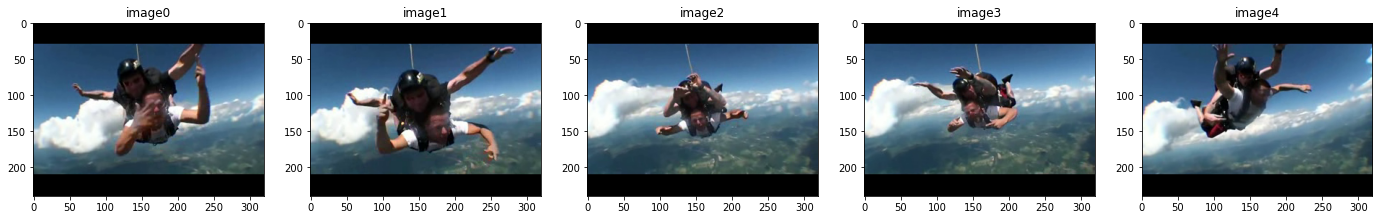

In [99]:
if __name__ == "__main__":
  dataset_path = '/content/drive/MyDrive/zebraCat/ToyDataset.csv'
  dataset = VideoFrames(dataset_path)
  sample_frames, caption = dataset[0]

  cols = dataset.num_frames
  figure, ax = plt.subplots(nrows=1, ncols=cols, figsize=(24,6))
  sample_frames = np.array(sample_frames)
  for i in range(cols):
    image = sample_frames[:,i,:,:]
    image = image.transpose(1,2,0)
    image = (image+1)*127.5
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = image.astype('uint8')
    ax[i].imshow(image)
    ax[i].set_title(f'image{i}')
    
  print(caption)